# Task 1 - Prediction Using Supervised Machine Learning
#### (Simple Linear Regression)

### by SHRIKANT SHRINIWAS BIYANI

#### Importing Libraries

In [1]:
import pandas as pd  # data manipulation
import numpy as np 
import matplotlib.pyplot as plt # visualization
%matplotlib inline
import seaborn as sns # visualization

#### Loading Data

In [7]:
df = pd.read_csv("http://bit.ly/w-data")

# Checking class of dataset like DataFrame or Series, etc.
print("Type of Dataset : \n", type(df), "\n")

# checking shape
print("The shape of Dataframe : \n" ,df.shape, "\n") 

# Checking Columns 
print("Columns in DataFrame : \n", df.columns, "\n")

# Checking DataTypes of DataFrame
print("DataTypes of Dataframe : \n", df.dtypes, "\n")


Type of Dataset : 
 <class 'pandas.core.frame.DataFrame'> 

The shape of Dataframe : 
 (25, 2) 

Columns in DataFrame : 
 Index(['Hours', 'Scores'], dtype='object') 

DataTypes of Dataframe : 
 Hours     float64
Scores      int64
dtype: object 



In [8]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [11]:
df.Hours.unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [14]:
df.Hours.value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

In [13]:
df.Scores.unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86], dtype=int64)

In [15]:
df.Scores.value_counts()

30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64


# Visualization

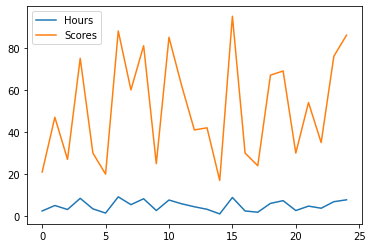

In [20]:
# Line graph
df.plot()

    1. As number of hours study increases the scores also increases.
    2. As number of hours study decreases the scores also decreases. 

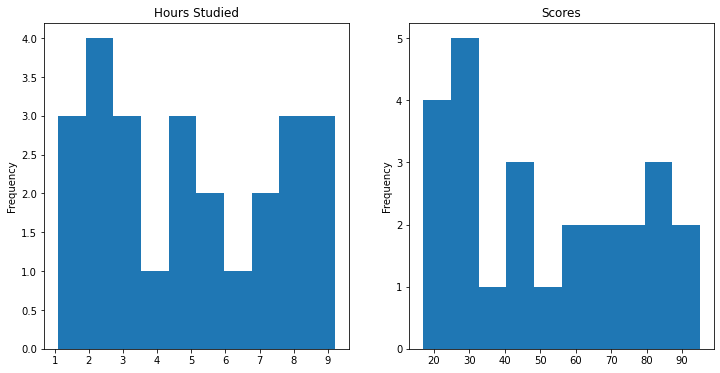

In [18]:
plt.subplot(1, 2, 1)
df["Hours"].plot(kind = "hist",title = "Hours Studied")
plt.subplot(1, 2, 2)
df["Scores"].plot(kind = 'hist',title = "Scores", figsize = (12,6))
plt.show()

# Bivariant Analysis

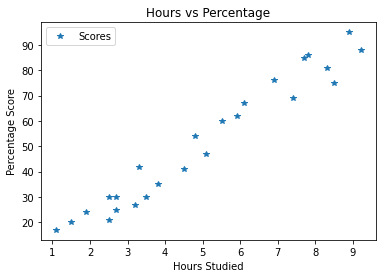

In [19]:
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### Observation -
            
           from above plot, we can clearly observed that their is Positive Linear Relationship between Studied  hours and Score percentange.

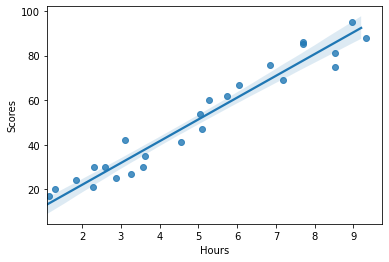

In [18]:
# sns.regplot(x="Hours", y="Scores", data=df, x_jitter=.25)

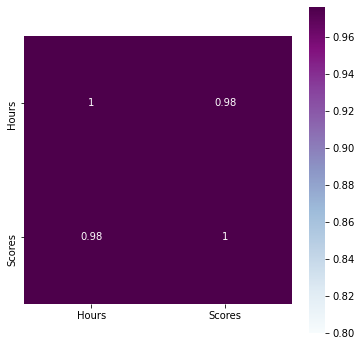

In [21]:
# Correlation between all Numerical variables
# Visualizing it in Heatmap

matrix = df.corr()
f, ax = plt.subplots(figsize = (6,6))
sns.heatmap(matrix, vmax = 0.8, square = True, annot=True,cmap = 'BuPu')

     We can see clear correlation between Hours & Scores.

# Model Building

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score

#### Splitting & Fitting Data

In [23]:
# spliting Target variables
X = df.iloc[:,:-1].values

# creating new dataset for target variables
y = df.iloc[:,-1].values

X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [24]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [25]:
# Splitting Dataframe into Training & Testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train

array([[7.7],
       [6.1],
       [7.4],
       [3.5],
       [3.2],
       [2.7],
       [9.2],
       [5.5],
       [3.8],
       [5.1],
       [2.5],
       [2.5],
       [8.9],
       [7.8],
       [6.9],
       [2.7],
       [8.3],
       [4.5],
       [5.9],
       [1.5]])

In [55]:
X_test

array([[1.1],
       [3.3],
       [1.9],
       [8.5],
       [4.8]])

In [28]:
# Create linear regression object
lin_reg = LinearRegression()

# Train the model using the training sets
lin_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
# Checking Co-efficient
print("Co-efficient : \n", lin_reg.coef_ , "\n")

# Checking Intercept
print("Intercept : \n", lin_reg.intercept_ ,"\n" )

Co-efficient : 
 [10.46110829] 

Intercept : 
 -1.5369573315500702 



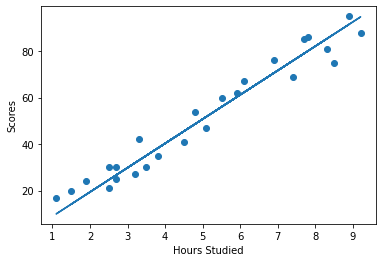

In [32]:
# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

## Making Prediction

In [37]:
# Making predictions using the testing set
y_pred = lin_reg.predict(X_test)

print("Prediction on Hours Test Data (X_test) as : \n")
list(y_pred)

Prediction on Hours Test Data (X_test) as : 



[9.97026179138372,
 32.9847000372513,
 18.339148426244655,
 87.38246316384739,
 48.676362477615555]

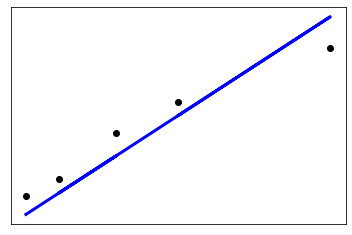

In [39]:
# Plotting ScatterPlot on Test Datasets after predictions

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [44]:
# Comparing between Actual & Predicted
actual_vs_predicted = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
actual_vs_predicted

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


# Evaluating Model

In [51]:
# The R Square Score
print('R Square Score as : %.2f'
      % r2_score(y_test, y_pred), "\n")

# Adjusted R2 Score 
print('Adjusted r2 Score as : %.2f' %(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))), "\n")

# The Mean Squared Error
print('Mean Squared Error as : %.2f'
      % mean_squared_error(y_test, y_pred), "\n")

# Mean Abolute Error - 
print("Mean Absolute Error as : %.2f"
     % mean_absolute_error(y_test, y_pred), "\n")


R Square Score as : 0.84 

Adjusted r2 Score as : 0.79 

Mean Squared Error as : 68.88 

Mean Absolute Error as : 7.88 



#### Random Prediction
    
    If a student studies for 9.25 hrs/ day what will be his predicted score?

In [52]:

student_study_hrs = [9.25]
student_study_pred = lin_reg.predict([[9.25]])
student_study_pred
print("No. of Hours Studied= {}".format(student_study_hrs))
print("Predicted Score = {}".format(student_study_pred[0]))

No. of Hours Studied= [9.25]
Predicted Score = 95.22829438402952
